In [61]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

permits = pd.read_csv("Building_Permits.csv")

np.random.seed(0) 
permits.head(10)

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,NaN,Ellis,St,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1380611233945
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,NaN,Geary,St,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1420164406718
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,NaN,Pacific,Av,...,1.0,constr type 1,1.0,constr type 1,NaN,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)",1424856504716
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,NaN,Pacific,Av,...,5.0,wood frame (5),5.0,wood frame (5),NaN,3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1443574295566
4,201611283529,6,demolitions,11/28/2016,0342,001,950,NaN,Market,St,...,3.0,constr type 3,NaN,NaN,NaN,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",144548169992
5,201706149344,8,otc alterations permit,06/14/2017,4105,009,800,NaN,Indiana,St,...,1.0,constr type 1,1.0,constr type 1,NaN,10.0,Potrero Hill,94107.0,"(37.75922331346539, -122.39170402628598)",1466911170855
6,201706300814,8,otc alterations permit,06/30/2017,1739,020,1291,NaN,11th,Av,...,5.0,wood frame (5),5.0,wood frame (5),NaN,5.0,Inner Sunset,94122.0,"(37.764145640138565, -122.46875112470363)",1468970403692
7,M803667,8,otc alterations permit,06/30/2017,4789,014,1465,NaN,Revere,Av,...,NaN,NaN,NaN,NaN,NaN,10.0,Bayview Hunters Point,94124.0,"(37.73005099023611, -122.38784938916618)",1469035175050
8,M804227,8,otc alterations permit,07/05/2017,1212,054,2094,NaN,Fell,St,...,NaN,NaN,NaN,NaN,NaN,5.0,Lone Mountain/USF,94117.0,"(37.772393498502595, -122.45231466824669)",1469198253772
9,M804767,8,otc alterations permit,07/06/2017,1259,016,89,NaN,Alpine,Tr,...,NaN,NaN,NaN,NaN,NaN,8.0,Haight Ashbury,94117.0,"(37.7691724293766, -122.43734859051908)",146932394171


In [2]:
missing_values_count = permits.isnull().sum()
missing_values_count[0:43]

Permit Number                                  0
Permit Type                                    0
Permit Type Definition                         0
Permit Creation Date                           0
Block                                          0
Lot                                            0
Street Number                                  0
Street Number Suffix                      196684
Street Name                                    0
Street Suffix                               2768
Unit                                      169421
Unit Suffix                               196939
Description                                  290
Current Status                                 0
Current Status Date                            0
Filed Date                                     0
Issued Date                                14940
Completed Date                            101709
First Construction Document Date           14946
Structural Notification                   191978
Number of Existing S

In [62]:
print(permits['Proposed Use'])

total_cells = np.product(permits['Proposed Use'].shape)
total_missing = missing_values_count['Proposed Use'].sum()

print('\nNUll data percentage',(total_missing/total_cells) * 100)

0                       NaN
1                       NaN
2              retail sales
3         1 family dwelling
4                       NaN
                ...        
198895                  NaN
198896           apartments
198897                  NaN
198898                  NaN
198899                  NaN
Name: Proposed Use, Length: 198900, dtype: object

NUll data percentage 21.33685268979387


In [4]:
print(permits['Proposed Units'])

total_cells = np.product(permits['Proposed Units'].shape)
total_missing = missing_values_count['Proposed Units'].sum()

print('\nNUll data percentage',(total_missing/total_cells) * 100)

0          NaN
1          NaN
2         39.0
3          1.0
4          NaN
          ... 
198895     NaN
198896     4.0
198897     NaN
198898     NaN
198899     NaN
Name: Proposed Units, Length: 198900, dtype: float64

NUll data percentage 25.596279537456006


In [5]:
print(permits['Estimated Cost'])

total_cells = np.product(permits['Estimated Cost'].shape)
total_missing = missing_values_count['Estimated Cost'].sum()

print('\nNUll data percentage',(total_missing/total_cells) * 100)


0           4000.0
1              1.0
2          20000.0
3           2000.0
4         100000.0
            ...   
198895         NaN
198896      5000.0
198897         NaN
198898         NaN
198899         NaN
Name: Estimated Cost, Length: 198900, dtype: float64

NUll data percentage 19.13826043237808


In [6]:
print(permits['Street Number Suffix'])
total_cells = np.product(permits['Street Number Suffix'].shape)
total_missing = missing_values_count['Street Number Suffix'].sum()
(total_missing/total_cells) * 100

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
198895    NaN
198896    NaN
198897    NaN
198898    NaN
198899    NaN
Name: Street Number Suffix, Length: 198900, dtype: object


98.88587229763701

In [7]:
permits['Street Number Suffix'].dropna()

92        A
146       C
164       A
200       C
273       A
         ..
198762    B
198771    A
198772    B
198803    A
198851    A
Name: Street Number Suffix, Length: 2216, dtype: object

In [8]:
columns_with_na_dropped = permits.dropna(axis=1)
columns_with_na_dropped.head()

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Name,Current Status,Current Status Date,Filed Date,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140,Ellis,expired,12/21/2017,05/06/2015,1380611233945
1,201604195146,4,sign - erect,04/19/2016,0306,007,440,Geary,issued,08/03/2017,04/19/2016,1420164406718
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647,Pacific,withdrawn,09/26/2017,05/27/2016,1424856504716
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230,Pacific,complete,07/24/2017,11/07/2016,1443574295566
4,201611283529,6,demolitions,11/28/2016,0342,001,950,Market,issued,12/01/2017,11/28/2016,144548169992


In [9]:
subset_nfl_data = permits.loc[:, ['Proposed Units','Estimated Cost',] ]
subset_nfl_data

,Proposed Units,Estimated Cost
0,NaN,4000.0
1,NaN,1.0
2,39.0,20000.0
3,1.0,2000.0
4,NaN,100000.0
...,...,...
198895,NaN,NaN
198896,4.0,5000.0
198897,NaN,NaN
198898,NaN,NaN


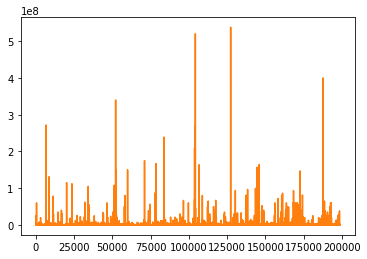

In [28]:
import matplotlib.pyplot as plt
plt.plot(data_with_imputed_values)
plt.show()

<AxesSubplot:>

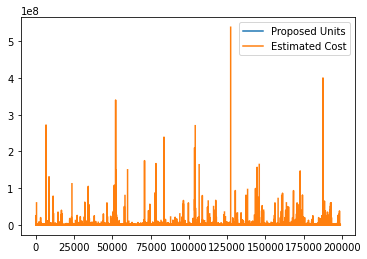

In [29]:
subset_nfl_data.plot()

In [34]:
permits['Proposed Units']

0          NaN
1          NaN
2         39.0
3          1.0
4          NaN
          ... 
198895     NaN
198896     4.0
198897     NaN
198898     NaN
198899     NaN
Name: Proposed Units, Length: 198900, dtype: float64

In [37]:
me = permits['Proposed Units'].fillna(permits['Proposed Units'].mean())
print (me)

0         16.51095
1         16.51095
2         39.00000
3          1.00000
4         16.51095
            ...   
198895    16.51095
198896     4.00000
198897    16.51095
198898    16.51095
198899    16.51095
Name: Proposed Units, Length: 198900, dtype: float64


In [77]:
print(permits['Proposed Use'])

0                       NaN
1                       NaN
2              retail sales
3         1 family dwelling
4                       NaN
                ...        
198895                  NaN
198896           apartments
198897                  NaN
198898                  NaN
198899                  NaN
Name: Proposed Use, Length: 198900, dtype: object


In [78]:
ge = permits['Proposed Use'].fillna(permits['Proposed Use'].value_counts().index[0])

In [88]:
p = permits['Proposed Use'].value_counts()
pk = p[0:7]
print("\nBefore frequent data imputation\n")
print(pk)
print("\nAfter frequent data imputation\n")
k = ge.value_counts()
jk = k[0:7]
print(jk)

#permits.drop(permits['Proposed Use'] > 5000, inplace = True)
#df3 = permits[permits['Proposed Use'] > 5000] 
#
#k.plot(kind='bar')
#print (k)


Before frequent data imputation

1 family dwelling       46346
apartments              43032
office                  23962
2 family dwelling       22061
retail sales             5079
food/beverage hndlng     5053
tourist hotel/motel      1601
Name: Proposed Use, dtype: int64

After frequent data imputation

1 family dwelling       88785
apartments              43032
office                  23962
2 family dwelling       22061
retail sales             5079
food/beverage hndlng     5053
tourist hotel/motel      1601
Name: Proposed Use, dtype: int64


<AxesSubplot:>

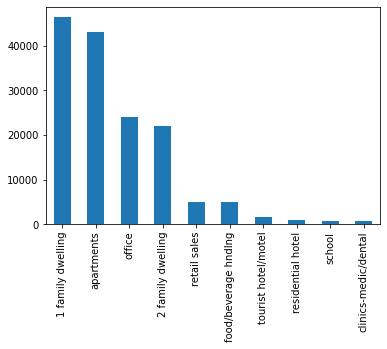

In [81]:
pk.plot(kind='bar')

<AxesSubplot:>

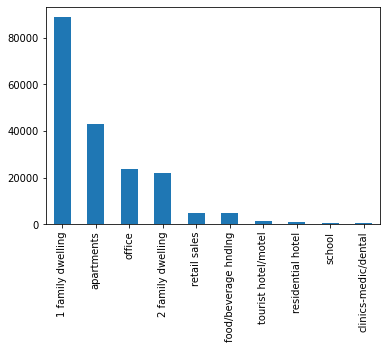

In [84]:
jk.plot(kind='bar')

In [90]:
mlo = permits['Proposed Units'].fillna('MISSING')
print (mlo)

0         MISSING
1         MISSING
2            39.0
3             1.0
4         MISSING
           ...   
198895    MISSING
198896        4.0
198897    MISSING
198898    MISSING
198899    MISSING
Name: Proposed Units, Length: 198900, dtype: object
